In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [129]:
df = pd.read_csv("../data/data.csv")

In [134]:
published = df[df['soltype'] == "Published Confirmed"].sort_values(by='pl_name').drop_duplicates(subset='pl_name', keep='first')

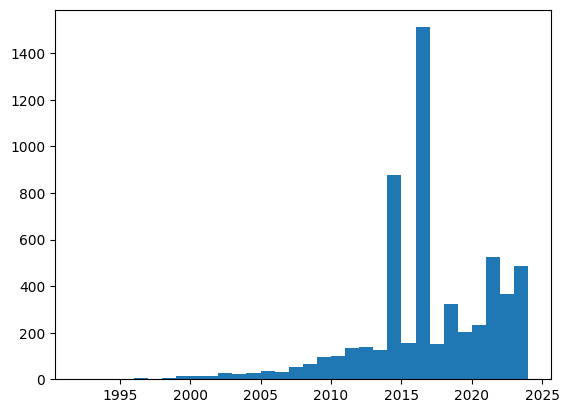

In [135]:
_ = plt.hist(published['disc_year'], bins=32)

In [114]:
disc_facility = published[['disc_facility', 'disc_year']]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Paranal Observatory'),
  Text(1, 0, 'Haute-Provence Observatory'),
  Text(2, 0, 'HATNet'),
  Text(3, 0, 'HATSouth'),
  Text(4, 0, 'KMTNet'),
  Text(5, 0, 'OGLE'),
  Text(6, 0, 'SuperWASP'),
  Text(7, 0, 'W. M. Keck Observatory'),
  Text(8, 0, 'La Silla Observatory'),
  Text(9, 0, 'Multiple Observatories'),
  Text(10, 0, 'Transiting Exoplanet Survey Satellite (TESS)'),
  Text(11, 0, 'K2'),
  Text(12, 0, 'Kepler')])

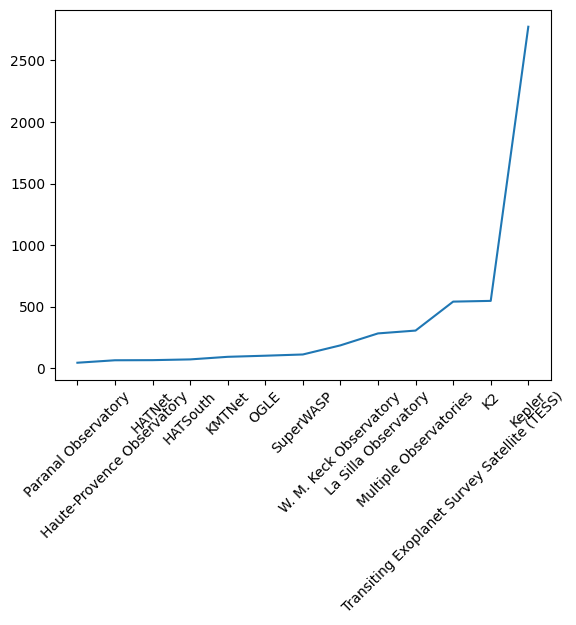

In [136]:
by_disc_facility = disc_facility.groupby(['disc_facility']).size().reset_index(name='cnt').sort_values(['cnt', 'disc_facility'])
by_disc_facility = by_disc_facility[by_disc_facility['cnt'] > 40]
plt.plot(by_disc_facility['disc_facility'], by_disc_facility['cnt'])
_ plt.xticks(rotation=45)  # Set the angle of x-axis ticks to 45 degrees

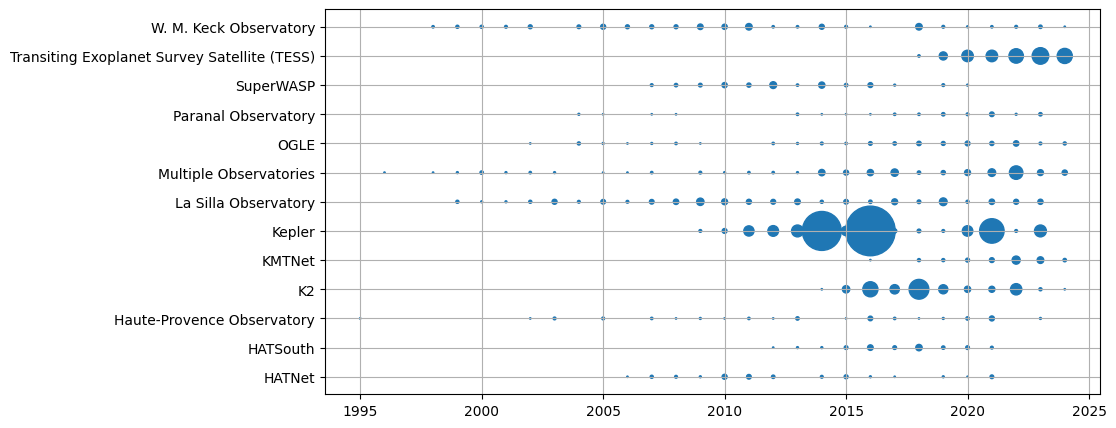

In [127]:
disc_facility_grouped = disc_facility.groupby(['disc_facility', 'disc_year']).size().reset_index(name='cnt')
big_disc_facility_year_grouped = disc_facility_grouped[(disc_facility_grouped['disc_facility'].isin(by_disc_facility['disc_facility']))]
plt.figure(figsize=(10, 5))  # 10 inches wide, 6 inches high

plt.scatter(big_disc_facility_year_grouped['disc_year'], big_disc_facility_year_grouped['disc_facility'], s=big_disc_facility_year_grouped['cnt'] )
plt.grid()